In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = "TRUE"

In [3]:
b_size = 5

train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,     #수평 대칭 이미지를 50% 확률로 만들어 추가합니다.
                                  width_shift_range=0.1,  #전체 크기의 10% 범위에서 좌우로 이동합니다.
                                  height_shift_range=0.1, #마찬가지로 위, 아래로 이동합니다.
                                  #rotation_range=5,
                                  #shear_range=0.7,
                                  #zoom_range=[0.9, 2.2],
                                  #vertical_flip=True,
                                  fill_mode='nearest') #주위의 px 값으로 채움

In [4]:
train_generator = train_datagen.flow_from_directory(
       'data/train',   #학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=b_size,
       class_mode='binary')

#테스트 셋은 이미지 부풀리기 과정을 진행하지 않습니다.
test_datagen = ImageDataGenerator(rescale=1./255)  

test_generator = test_datagen.flow_from_directory(
       'data/test',   #테스트셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=b_size,
       class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [7]:
model.compile(loss='sparse_categorical_crossentropy',  #정답이 단순 정수로 되어 있어도 오차 계산 (softmax - scc or sigmoid -binary_crossentropy) 
            #훈련데이터의 label(y/target) 값이 원-핫 벡터 형태인 경우 categorical_crossentropy를 사용하고
            #훈련데이터의 label(y/target) 값이 정수 형태인 경우 sparse_categorical_crossentropy
            optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy']) #0.001 default -> learning_rate=0.0002

In [8]:
history=model.fit(train_generator,
                  epochs=20,
                  validation_data=test_generator)

Epoch 1/20
32/32 [==============================] - 4s 99ms/step - loss: 0.6993 - accuracy: 0.5250 - val_loss: 0.6875 - val_accuracy: 0.5000
Epoch 2/20
32/32 [==============================] - 2s 60ms/step - loss: 0.6877 - accuracy: 0.5312 - val_loss: 0.6822 - val_accuracy: 0.5000
Epoch 3/20
32/32 [==============================] - 2s 60ms/step - loss: 0.6880 - accuracy: 0.5938 - val_loss: 0.6702 - val_accuracy: 0.7500
Epoch 4/20
32/32 [==============================] - 2s 58ms/step - loss: 0.6703 - accuracy: 0.6187 - val_loss: 0.6709 - val_accuracy: 0.5000
Epoch 5/20
32/32 [==============================] - 2s 61ms/step - loss: 0.6757 - accuracy: 0.6125 - val_loss: 0.6320 - val_accuracy: 0.7167
Epoch 6/20
32/32 [==============================] - 2s 57ms/step - loss: 0.6270 - accuracy: 0.6875 - val_loss: 0.5969 - val_accuracy: 0.6917
Epoch 7/20
32/32 [==============================] - 2s 58ms/step - loss: 0.5929 - accuracy: 0.6687 - val_loss: 0.5188 - val_accuracy: 0.7917
Epoch 8/20
32

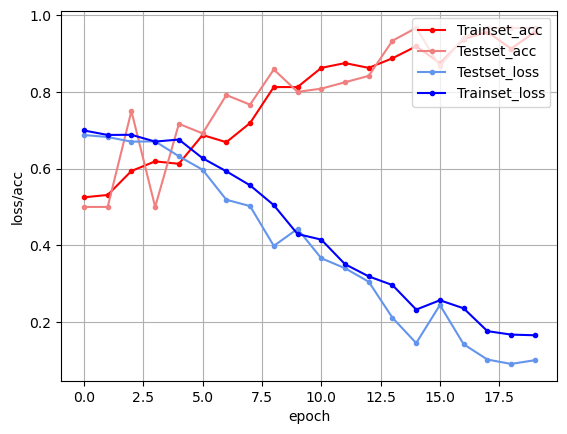

In [9]:
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))  
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()